In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def compute_loss(y, tx, w):
    N = len(y)
    error =y - np.dot(tx,w)
    return 1/(2*N)*np.dot(error.T,error)
    
def grid_search(y, tx, w0, w1):
    losses = np.zeros((len(w0), len(w1)))
    len_losses = len(losses)
    for i in range(0, len_losses):
        for j in range(0, len_losses):
            losses[i][j] = compute_loss(y,tx,np.array([w0[i],w1[j]]).T)    
    return losses    

def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    
    w = np.dot(np.dot(np.linalg.inv(np.dot(tx.T,tx)),tx.T),y)
    
    
    N = len(y)
    error =y - np.dot(tx,w)
    mse = 1/(2*N)*np.dot(error.T,error)
    
    return mse, w
    # ***************************************************
    #raise NotImplementedError
    


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
import datetime

from grid_search import generate_w, get_best_parameters
#from plots import grid_visualization


def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=10)
    # Start the grid search
    start_time = datetime.datetime.now()
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    end_time = datetime.datetime.now()
    execution_time = (end_time - start_time).total_seconds()
    # Print the results
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

    start_time = datetime.datetime.now()
    mse_loss, w = least_squares(y,tx)
    end_time = datetime.datetime.now()
    execution_time = (end_time - start_time).total_seconds()
    print("Least Squares: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=mse_loss, w0=w[0], w1=w[1], t=execution_time))
    
    return
    # ***************************************************
    #raise NotImplementedError
    
    





Test it here

In [4]:
test_your_least_squares()

Grid Search: loss*=42.42448314678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.003 seconds
Least Squares: loss*=15.385887868829398, w0*=73.29392200210519, w1*=13.479712434989047, execution time=0.000 seconds


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    poly = np.ones((len(x),degree+1))
    poly[:,1] = x
    for j in range(2,degree+1):
        poly[:,j] = np.power(x,j)
    return poly
    # ***************************************************
    #raise NotImplementedError

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [7]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        tx_poly = build_poly(x,degree)
        
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        mse, weights = least_squares(y, tx_poly)
        rmse = np.sqrt(2*mse)
        
        # ***************************************************
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

[0.35237491 4.8951233  1.86662437]


Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773748
Processing 3th experiment, degree=7, rmse=0.24965870360908132
Processing 4th experiment, degree=12, rmse=0.5717861739980409


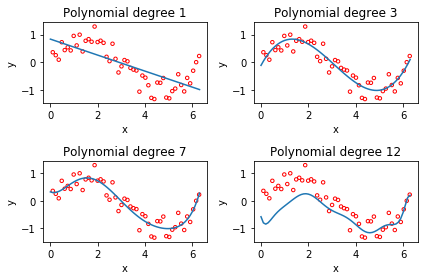

In [8]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [13]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    
    n_train = ratio*len(y)
    np.random.shuffle(x)
    data_train = x[:n_train,:]
    data_test = xp[n_train:,:]
    
    return data_train, data_test
    # ***************************************************
    #raise NotImplementedError

Then, test your `split_data` function below.

In [ ]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    data_train, data_test = split_data(x,y,ratio)
    
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    
    
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [ ]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

# 3 Ridge Regression
Please fill in the function below.

In [ ]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    raise NotImplementedError


In [ ]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)